# Perceptron Logic Gates

To begin, let’s think of an AND gate as a dataset of four points. The four points should be the four possible inputs to the AND gate. For example, the first point in the dataset should be [0, 0].

Create a variable named data that is a list that contains the four possible inputs to an AND gate.

Create a variable named labels. This should be a list where each label corresponds to a point in data. For example, if the last item in data is [1, 1], the last label should be 1

from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import numpy as np
from itertools import product

data=[[0,0],[0,1],[1,1],[1,0]]
labels=[0,0,1,0]

Let’s plot these four points on a graph

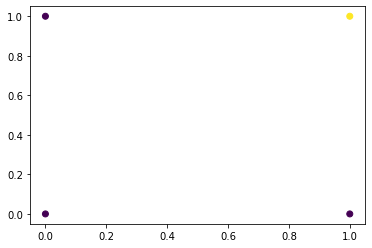

In [2]:
plt.scatter([point[0] for point in data],[point[1] for point in data],c=labels)
plt.show()

Now that we have our data, let’s build a perceptron to learn AND. Create a Perceptron object named classifier. For now, set the parameter max_iter to 40.

In [3]:
classifier=Perceptron(max_iter =40)
classifier.fit(data,labels)


Perceptron(max_iter=40)

We’ll now train the model. Call the .fit() method using data and labels as parameters.

Let’s see if the algorithm learned AND. Call classifier‘s .score() method using data and labels as parameters. Print the results

In [4]:
classifier.fit(data,labels)

print(classifier.score(data,labels))

1.0


Your perceptron should have 100% accuracy! You just taught it an AND gate!

Let’s change the labels so your data now represents an XOR gate. The label should be a 1 only if one of the inputs is a 1. What is the accuracy of the perceptron now? Is the data linearly separable?

In [6]:
# XOR gate
data=[[0,0],[0,1],[1,1],[1,0]]
labels=[0,1,0,1]

classifier.fit(data,labels)
classifier.fit(data,labels)

print(classifier.score(data,labels))

0.5


In [ ]:
Try changing the data to represent an OR gate. The label of a point should be a 1 if any of the input values are a 1.

In [7]:
#OR gate
data=[[0,0],[0,1],[1,1],[1,0]]
labels=[0,1,1,1]

classifier.fit(data,labels)
classifier.fit(data,labels)

print(classifier.score(data,labels))

1.0


We know the perceptron has been trained correctly, but let’s try to visualize what decision boundary it is making. Reset your labels to be representing an AND gate.

Let’s first investigate the classifier’s .decision_function() method. Given a list of points, this method returns the distance those points are from the decision boundary. The closer the number is to 0, the closer that point is to the decision boundary.

Try calling classifier‘s .decision_function() method using [[0, 0], [1, 1], [0.5, 0.5]] as a parameter. Print the results.

Is the point [0, 0] or the point [1, 1] closer to the decision boundary?

In [8]:
data=[[0,0],[0,1],[1,1],[1,0]]
labels=[0,0,1,0]
classifier.fit(data,labels)
classifier.fit(data,labels)
print(classifier.decision_function([[0, 0], [1, 1], [0.5, 0.5]]))

[-3.  1. -1.]


Even though an input like [0.5, 0.5] isn’t a real input to an AND logic gate, we can still check to see how far it is from the decision boundary. We could also do this to the point [0, 0.1], [0, 0.2] and so on. If we do this for a grid of points, we can make a heat map that reveals the decision boundary. To begin, we need to create a list of the points we want to input to .decision_function(). Begin by creating a list named x_values. x_values should be a list of 100 evenly spaced decimals between 0 and 1. np.linspace(0, 1, 100) will do this. Do the same for y_values.

Call product() using x_values and y_values as paramters. Don’t forget to put list() around the call to product(). Store the result in a variable named point_grid.

In [9]:
x_values=np.linspace(0, 1, 100)
y_values=np.linspace(0, 1, 100)
point_grid=list(product(x_values,y_values))

Call classifier‘s .decision_function() method using point_grid as a parameter. Store the results in a variable named distances.

In [10]:
distances=classifier.decision_function(point_grid)

Right now distances stores positive and negative values. We only care about how far away a point is from the boundary — we don’t care about the sign.

Take the absolute value of every distance. Use list comprehension to call abs() on every point in the list and store it in a new variable called abs_distances.

In [11]:
abs_distances=[abs(pt) for pt in distances]

We’re almost ready to draw the heat map. We’re going to be using Matplotlib’s pcolormesh() function.
It’s finally time to draw the heat map! Call plt.pcolormesh() with the following three parameters:

x_values
y_values
distances_matrix
Save the result in a variable named heatmap.

Then call plt.colorbar() using heatmap as a parameter. This will put a legend on the heat map.

<ipython-input-13-c8659d701db5>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  heatmap=plt.pcolormesh(x_values,y_values,distances_matrix)


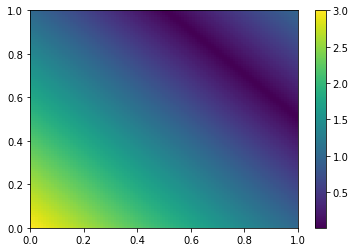

In [13]:

distances_matrix=np.reshape(abs_distances,(100,100))
heatmap=plt.pcolormesh(x_values,y_values,distances_matrix)
plt.colorbar(heatmap)
plt.show()